#### Creating the DataFrames to visualize the data

In [3]:
import os
import pandas as pd

In [4]:
root_dir = r'D:\Nuvem\OneDrive - Indra\Área de Trabalho\DATAGLOWUP_34\downloads'

# List all the file names to be searched in each subfolder
file_names = ['listings.csv', 'listings_2.csv', 'calendar_2.csv', 'neighbourhoods.csv', 'reviews.csv', 'reviews_2.csv']

# Dictionary to store the combined DataFrames for each file name
combined_dataframes = {}

# Iterate over the file names
for filename in file_names:
    # List to store the DataFrames from each subfolder for a specific file
    dataframes = []
    # Iterate over the subfolders
    for foldername, _, filenames in os.walk(root_dir):
        # Check if the file is present in the subfolder
        if filename in filenames:
            # Construct the full path to the file
            filepath = os.path.join(foldername, filename)
            # Read the file and store it in a DataFrame
            df = pd.read_csv(filepath, low_memory=False)
            # Remove columns with all null values
            df = df.dropna(axis=1, how='all')
            # Add a new column with the city name (subfolder name)
            df['City'] = os.path.basename(foldername)
            # Add the DataFrame to the list
            dataframes.append(df)
    # Combine all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)
    # Store the combined DataFrame in the dictionary
    combined_dataframes[filename] = combined_df

In [4]:
# Show the combined DataFrames for each file
for filename, df in combined_dataframes.items():
    print(f'\nCombined DataFrame for {filename}:')
    print(df.info())
    print('\nNulls per column:')
    print(df.isnull().sum())


DataFrame combinado para listings.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194436 entries, 0 to 194435
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              194436 non-null  int64  
 1   name                            194436 non-null  object 
 2   host_id                         194436 non-null  int64  
 3   host_name                       194436 non-null  object 
 4   neighbourhood                   194436 non-null  object 
 5   latitude                        194436 non-null  float64
 6   longitude                       194436 non-null  float64
 7   room_type                       194436 non-null  object 
 8   price                           183729 non-null  float64
 9   minimum_nights                  194436 non-null  int64  
 10  number_of_reviews               194436 non-null  int64  
 11  last_review                     144754

In [7]:
# Show the first lines for each combined DataFrame
for filename, df in combined_dataframes.items():
    print(f'\nCombined DataFrame for {filename}:')
    print(df.head())


DataFrame combinado para listings.csv:
       id                                               name  host_id  \
0   15526  Villa in Solto Collina · ★4.83 · 2 bedrooms · ...    60754   
1   15542  Villa in Solto Collina · ★4.91 · 1 bedroom · 2...    60754   
2  116423  Rental unit in Bossico · ★4.73 · 2 bedrooms · ...   588254   
3  179345  Rental unit in Bossico · ★4.75 · 1 bedroom · 4...   588254   
4  215933  Loft in Bergamo · ★4.90 · 1 bedroom · 2 beds ·...   816380   

  host_name  neighbourhood   latitude  longitude        room_type  price  \
0    Andrea  Solto Collina  45.783200  10.026600  Entire home/apt  135.0   
1    Andrea  Solto Collina  45.782840  10.024570  Entire home/apt   99.0   
2    Angela        Bossico  45.828400  10.044760  Entire home/apt   67.0   
3    Angela        Bossico  45.827220  10.046020  Entire home/apt   77.0   
4  Marcella        Bergamo  45.698385   9.675597     Private room  100.0   

   minimum_nights  number_of_reviews last_review  reviews_per_mo

#### Price tendency analysis

In [5]:
listings = combined_dataframes.get('listings.csv')
reviews = combined_dataframes.get('reviews.csv')

# Display the first few rows of each dataframe to understand their structure
print(listings.head())
print(reviews.head())

# Filter the listings dataframe to include only the columns needed for the analysis
listings_filtered = listings[['id', 'price', 'room_type']]

# Filter the reviews dataframe to include only the columns needed for the analysis
reviews_filtered = reviews[['listing_id', 'date']]

# Display the first few rows of the filtered dataframes
print(listings_filtered.head())
print(reviews_filtered.head())

       id                                               name  host_id  \
0   15526  Villa in Solto Collina · ★4.83 · 2 bedrooms · ...    60754   
1   15542  Villa in Solto Collina · ★4.91 · 1 bedroom · 2...    60754   
2  116423  Rental unit in Bossico · ★4.73 · 2 bedrooms · ...   588254   
3  179345  Rental unit in Bossico · ★4.75 · 1 bedroom · 4...   588254   
4  215933  Loft in Bergamo · ★4.90 · 1 bedroom · 2 beds ·...   816380   

  host_name  neighbourhood   latitude  longitude        room_type  price  \
0    Andrea  Solto Collina  45.783200  10.026600  Entire home/apt  135.0   
1    Andrea  Solto Collina  45.782840  10.024570  Entire home/apt   99.0   
2    Angela        Bossico  45.828400  10.044760  Entire home/apt   67.0   
3    Angela        Bossico  45.827220  10.046020  Entire home/apt   77.0   
4  Marcella        Bergamo  45.698385   9.675597     Private room  100.0   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               4                

In [6]:
# Merge the filtered listings and reviews dataframes on id and listing_id
merged_df = pd.merge(reviews_filtered, listings_filtered, left_on='listing_id', right_on='id')

# Display the first few rows of the merged dataframe to ensure it worked correctly
print(merged_df.head())

   listing_id        date     id  price        room_type
0       15526  2011-06-14  15526  135.0  Entire home/apt
1       15526  2011-07-31  15526  135.0  Entire home/apt
2       15526  2012-09-22  15526  135.0  Entire home/apt
3       15526  2013-08-08  15526  135.0  Entire home/apt
4       15526  2014-06-12  15526  135.0  Entire home/apt


In [7]:
# Convert the 'date' column in reviews to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Convert the 'price' column in listings to numeric (removing any non-numeric characters)
merged_df['price'] = merged_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Check the data types to ensure conversions were successful
print(merged_df.dtypes)

listing_id             int64
date          datetime64[ns]
id                     int64
price                float64
room_type             object
dtype: object


In [8]:
# Group by room_type and date, then calculate the average price
grouped_df = merged_df.groupby(['room_type', merged_df['date'].dt.to_period('M')]).agg({'price': 'mean'}).reset_index()

# Rename columns for clarity
grouped_df.columns = ['room_type', 'date', 'average_price']

# Convert the 'date' column back to datetime format for plotting
grouped_df['date'] = grouped_df['date'].dt.to_timestamp()

# Display the first few rows of the grouped dataframe to check the results
print(grouped_df.head())

         room_type       date  average_price
0  Entire home/apt 2009-08-01     230.000000
1  Entire home/apt 2010-04-01      60.000000
2  Entire home/apt 2010-05-01      86.000000
3  Entire home/apt 2010-06-01     125.500000
4  Entire home/apt 2010-07-01     155.333333


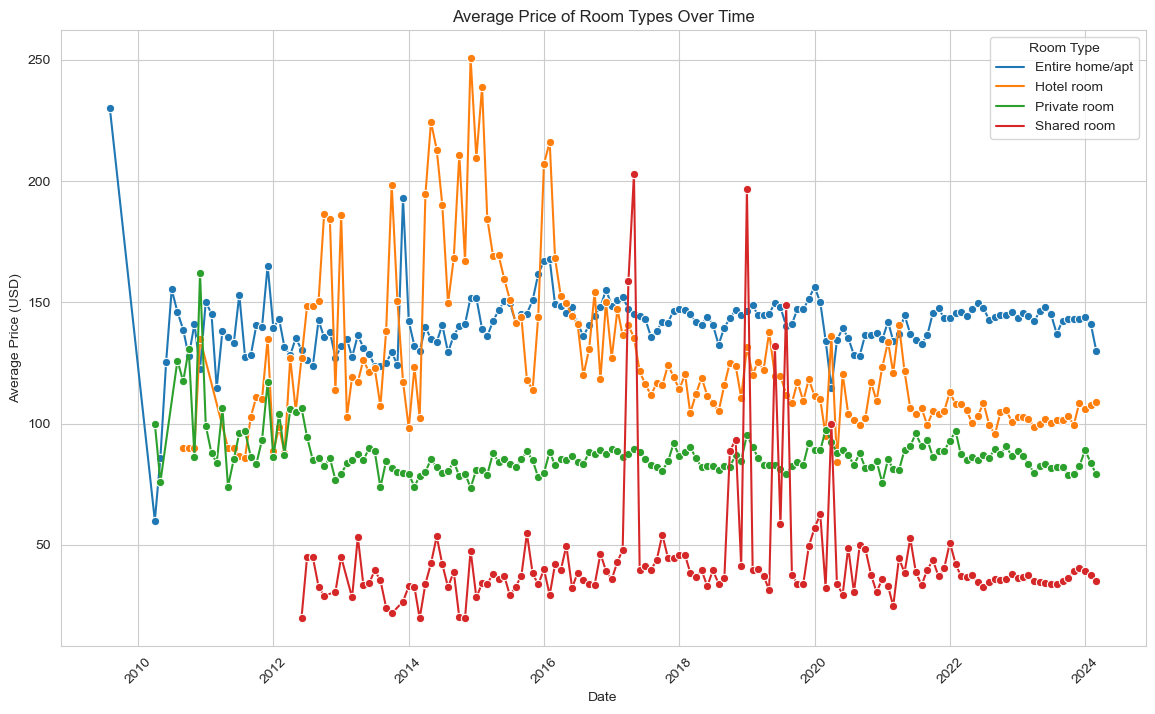

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size and style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot the average price over time for each room type
sns.lineplot(data=grouped_df, x='date', y='average_price', hue='room_type', marker='o')

# Set plot labels and title
plt.title('Average Price of Room Types Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')
plt.legend(title='Room Type')
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Ocuppation Analysis

In [23]:
listings_filtered = listings[['id', 'room_type']]
reviews_filtered = reviews[['listing_id', 'date']]

# Convert the 'date' column in reviews to datetime
reviews_filtered['date'] = pd.to_datetime(reviews_filtered['date'])

# Extract the month and year from the 'date' column
reviews_filtered['month_year'] = reviews_filtered['date'].dt.to_period('M')

# Count the number of reviews per month for each listing
monthly_reviews = reviews_filtered.groupby(['listing_id', 'month_year']).size().reset_index(name='review_count')

# Merge with the listings dataframe to get the room type
merged_data = pd.merge(monthly_reviews, listings_filtered, left_on='listing_id', right_on='id')

# Group by month and room type to calculate the average review count (as a proxy for occupancy)
average_occupancy = merged_data.groupby(['room_type', 'month_year'])['review_count'].mean().reset_index()

# Convert the 'month_year' column to timestamp
average_occupancy['month_year'] = average_occupancy['month_year'].dt.to_timestamp()

# Display the first few rows of the average occupancy dataframe
print(average_occupancy.head())

C:\Users\Trabalho\AppData\Local\Temp\ipykernel_7564\3392352609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_filtered['date'] = pd.to_datetime(reviews_filtered['date'])


         room_type month_year  review_count
0  Entire home/apt 2009-08-01           1.0
1  Entire home/apt 2010-04-01           1.0
2  Entire home/apt 2010-05-01           2.0
3  Entire home/apt 2010-06-01           1.0
4  Entire home/apt 2010-07-01           1.0


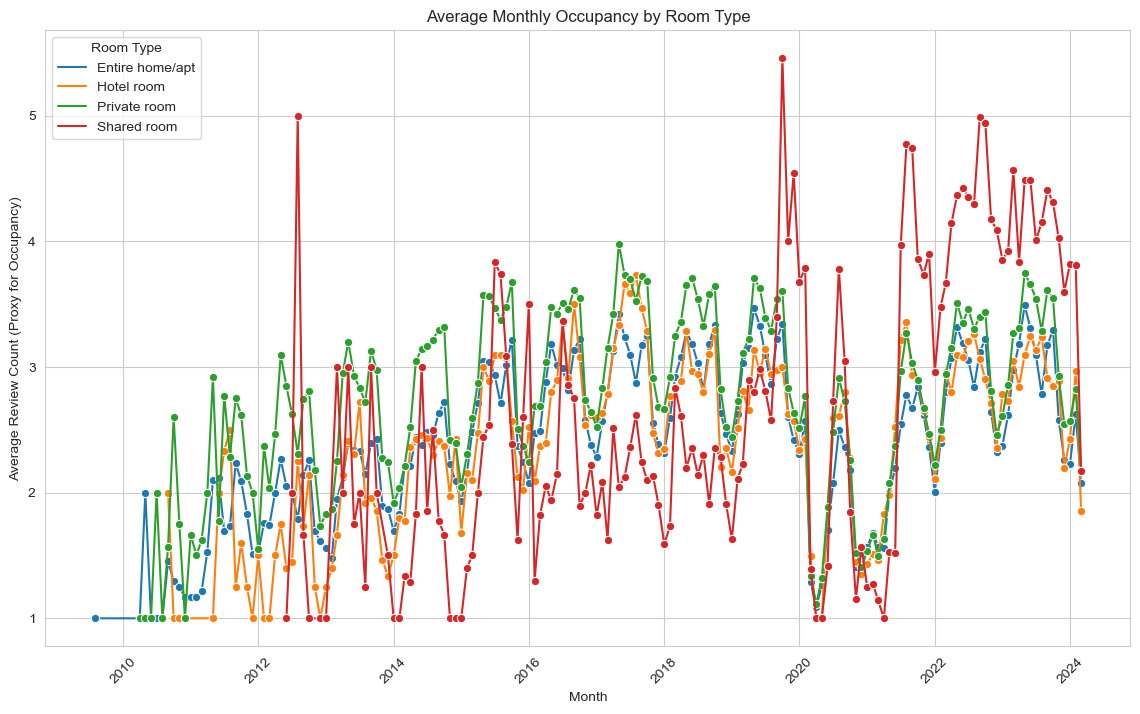

In [24]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

sns.lineplot(data=average_occupancy, x='month_year', y='review_count', hue='room_type', marker='o')

plt.title('Average Monthly Occupancy by Room Type')
plt.xlabel('Month')
plt.ylabel('Average Review Count (Proxy for Occupancy)')
plt.legend(title='Room Type')
plt.xticks(rotation=45)

# Show graph
plt.show()


Let's dig deeper and see if there's a particular month or trimester where the ocupation rate is higher.

Monthly occupation mean:
  month_year  year  month  review_count
0 2021-01-01  2021      1      1.446138
1 2021-02-01  2021      2      1.532925
2 2021-03-01  2021      3      1.419628
3 2021-04-01  2021      4      1.504201
4 2021-05-01  2021      5      1.896743


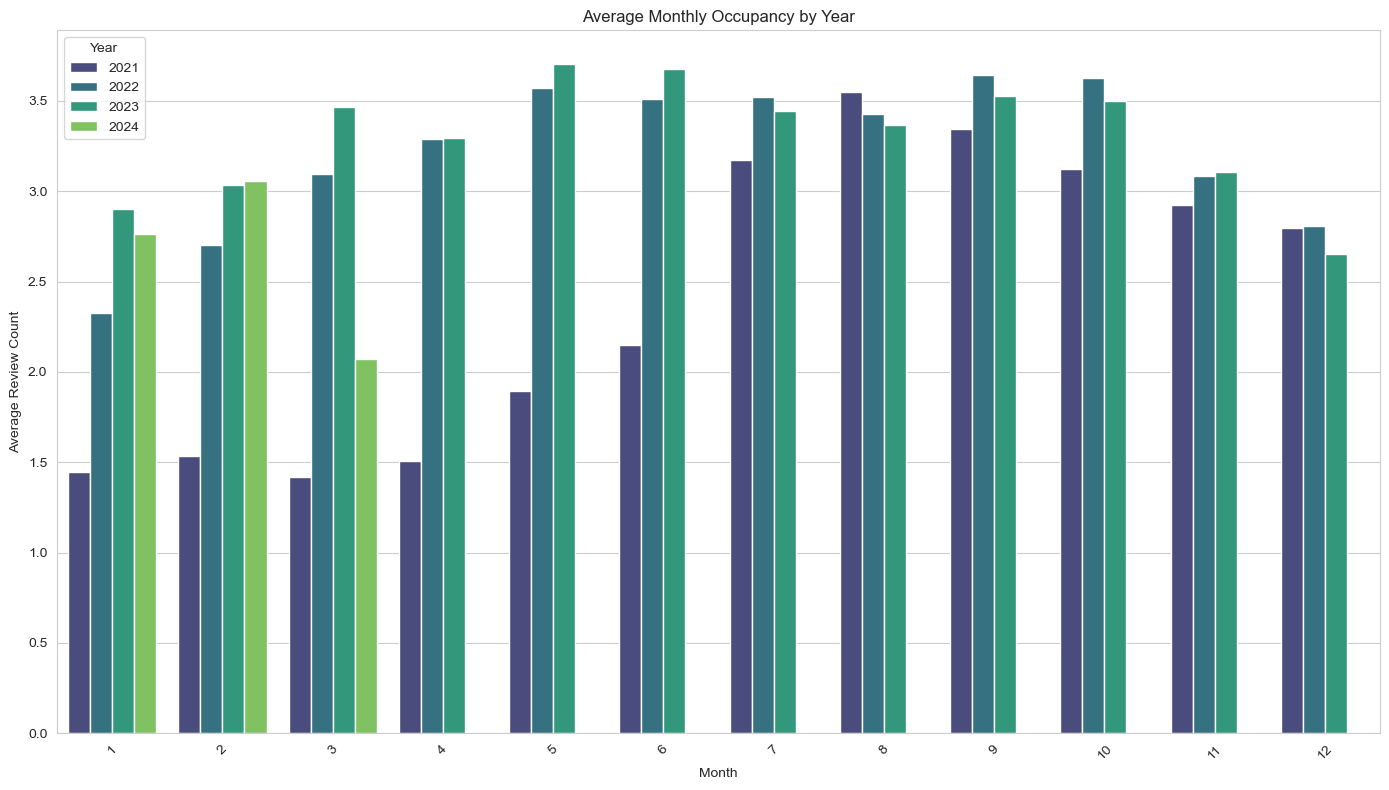

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'month_year' column to datetime and extract year and month
average_occupancy['month_year'] = pd.to_datetime(average_occupancy['month_year'])
average_occupancy['year'] = average_occupancy['month_year'].dt.year
average_occupancy['month'] = average_occupancy['month_year'].dt.month

# Filter data for year >= 2020
average_occupancy = average_occupancy[average_occupancy['year'] >= 2020]

# Calculate the average review count per month and year
average_occupancy_monthly = average_occupancy.groupby(['month_year', 'year','month'])['review_count'].mean().reset_index()

# Show the first lines
print("Monthly occupation mean:")
print(average_occupancy_monthly.head())

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot the barplot
sns.barplot(data=average_occupancy_monthly, x='month', y='review_count', hue='year', palette='viridis')

# Configure labels and title
plt.title('Average Monthly Occupancy by Year')
plt.xlabel('Month')
plt.ylabel('Average Review Count')
plt.legend(title='Year', loc='upper left')
plt.xticks(rotation=45)

# Display the graph
plt.tight_layout()
plt.show()

#### Score Analysis

In [40]:
listings_2 = combined_dataframes.get('listings_2.csv')

# Display the first few rows of each dataframe to understand their structure
print(listings_2.head())

# Filter the listings dataframe to include only the columns needed for the analysis
listings_2_filtered = listings_2[['id', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location','room_type']]

# Display the first few rows of the filtered dataframes
print(listings_2_filtered.head())

                   id                                      listing_url  \
0            53527563            https://www.airbnb.com/rooms/53527563   
1  583843076540750428  https://www.airbnb.com/rooms/583843076540750428   
2  902842874652788522  https://www.airbnb.com/rooms/902842874652788522   
3            53570244            https://www.airbnb.com/rooms/53570244   
4  922282138679070466  https://www.airbnb.com/rooms/922282138679070466   

        scrape_id last_scraped       source  \
0  20231229163156   2023-12-29  city scrape   
1  20231229163156   2023-12-29  city scrape   
2  20231229163156   2023-12-29  city scrape   
3  20231229163156   2023-12-30  city scrape   
4  20231229163156   2023-12-30  city scrape   

                                                name  \
0  Rental unit in Dossena · ★4.43 · 1 bedroom · 2...   
1  Rental unit in Plassi · ★4.85 · 1 bedroom · 2 ...   
2  Rental unit in Ranzanico · ★4.83 · 1 bedroom ·...   
3  Vacation home in Bergamo · ★4.93 · 2 bedrooms

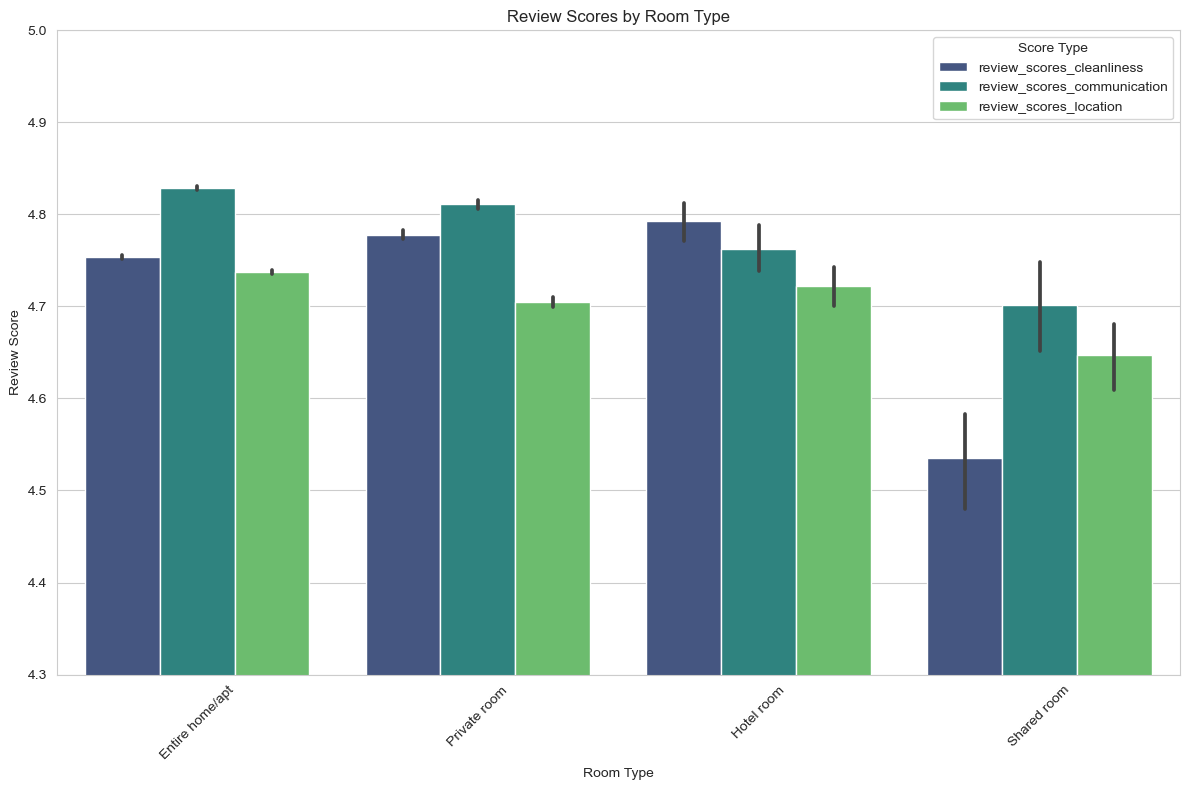

In [43]:
# Melt the DataFrame to long format for easier plotting
listings_2_melted = pd.melt(listings_2_filtered, id_vars=['id', 'room_type'], 
                            var_name='score_type', value_name='score')

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plot the barplot
sns.barplot(data=listings_2_melted, x='room_type', y='score', hue='score_type', palette='viridis')

# Adjust y-axis limits
plt.ylim(4.3, 5)

# Configure labels and title
plt.title('Review Scores by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Review Score')
plt.legend(title='Score Type', loc='upper right')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Comments analysis

In [44]:
# Load the reviews_2 dataframe from the combined_dataframes directory
reviews_2 = combined_dataframes.get('reviews_2.csv')

# Display the first lines
print(reviews_2.head())

   listing_id        id        date  reviewer_id reviewer_name  \
0       15526    314442  2011-06-14       324113      Modestas   
1       15526    408859  2011-07-31       788193           Jon   
2       15526   2369937  2012-09-22      3148551        Oriane   
3       15526   6324796  2013-08-08       397704        Martin   
4       15526  14113480  2014-06-12      4789610         Lissy   

                                            comments     City  
0  We went for weekends experience to Italy to st...  bergamo  
1  The view from the terrace is amazing, even bet...  bergamo  
2  Maison splendide. Accueil très agréable. Ernes...  bergamo  
3  Abbiamo passato cinque notti al Palazzo e ci s...  bergamo  
4  It was so fantastic to stay in Palazzo. The wa...  bergamo  


In [46]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download lexicon from VADER
nltk.download('vader_lexicon')

# Inicialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment function
def analyze_sentiment(comment):
    if pd.isnull(comment):
        return 0  # Podemos retornar 0 ou qualquer outro valor que faça sentido para comentários nulos
    return sia.polarity_scores(comment)['compound']

# Apply function to each comment
reviews_2['sentiment'] = reviews_2['comments'].apply(analyze_sentiment)

# Display the first lines
print(reviews_2.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Trabalho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   listing_id        id        date  reviewer_id reviewer_name  \
0       15526    314442  2011-06-14       324113      Modestas   
1       15526    408859  2011-07-31       788193           Jon   
2       15526   2369937  2012-09-22      3148551        Oriane   
3       15526   6324796  2013-08-08       397704        Martin   
4       15526  14113480  2014-06-12      4789610         Lissy   

                                            comments     City  sentiment  
0  We went for weekends experience to Italy to st...  bergamo     0.9520  
1  The view from the terrace is amazing, even bet...  bergamo     0.8687  
2  Maison splendide. Accueil très agréable. Ernes...  bergamo     0.0000  
3  Abbiamo passato cinque notti al Palazzo e ci s...  bergamo     0.0000  
4  It was so fantastic to stay in Palazzo. The wa...  bergamo     0.9864  


In [49]:
# Group the sentiment analyze per city and calculate the mean
city_sentiments = reviews_2.groupby('City')['sentiment'].mean().reset_index()

# Order the cities by the sentiments mean
city_sentiments = city_sentiments.sort_values(by='sentiment', ascending=False)

# Display the first lines
print(city_sentiments.head(10))
print(city_sentiments.tail(10))

       City  sentiment
2  florence   0.598017
9    venice   0.554592
6      rome   0.551721
4    naples   0.481184
3     milan   0.480273
1   bologna   0.478214
7    sicily   0.426710
0   bergamo   0.423869
5    puglia   0.390265
8  trentino   0.261758
       City  sentiment
2  florence   0.598017
9    venice   0.554592
6      rome   0.551721
4    naples   0.481184
3     milan   0.480273
1   bologna   0.478214
7    sicily   0.426710
0   bergamo   0.423869
5    puglia   0.390265
8  trentino   0.261758


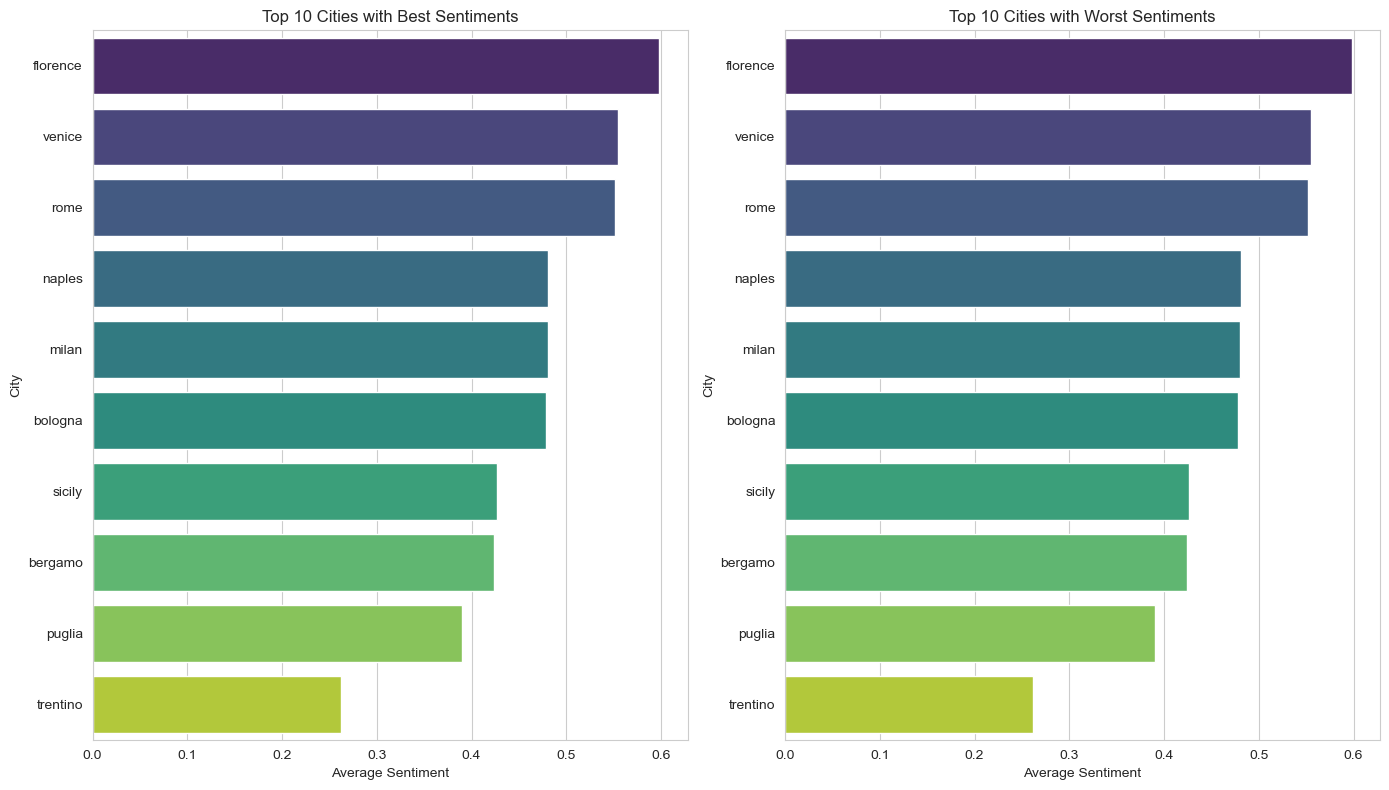

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot graph with the cities with the best sentiments
plt.subplot(1, 2, 1)
top_cities = city_sentiments.head(10)
sns.barplot(data=top_cities, x='sentiment', y='City', palette='viridis')
plt.title('Top 10 Cities with Best Sentiments')
plt.xlabel('Average Sentiment')
plt.ylabel('City')

# Plot graph the graph with the cities with the worst sentiments
plt.subplot(1, 2, 2)
bottom_cities = city_sentiments.tail(10)
sns.barplot(data=bottom_cities, x='sentiment', y='City', palette='viridis')
plt.title('Top 10 Cities with Worst Sentiments')
plt.xlabel('Average Sentiment')
plt.ylabel('City')

plt.tight_layout()
plt.show()

#### Analyzing the most popular ammenities between guests

                   id                                      listing_url  \
0            53527563            https://www.airbnb.com/rooms/53527563   
1  583843076540750428  https://www.airbnb.com/rooms/583843076540750428   
2  902842874652788522  https://www.airbnb.com/rooms/902842874652788522   
3            53570244            https://www.airbnb.com/rooms/53570244   
4  922282138679070466  https://www.airbnb.com/rooms/922282138679070466   

        scrape_id last_scraped       source  \
0  20231229163156   2023-12-29  city scrape   
1  20231229163156   2023-12-29  city scrape   
2  20231229163156   2023-12-29  city scrape   
3  20231229163156   2023-12-30  city scrape   
4  20231229163156   2023-12-30  city scrape   

                                                name  \
0  Rental unit in Dossena · ★4.43 · 1 bedroom · 2...   
1  Rental unit in Plassi · ★4.85 · 1 bedroom · 2 ...   
2  Rental unit in Ranzanico · ★4.83 · 1 bedroom ·...   
3  Vacation home in Bergamo · ★4.93 · 2 bedrooms

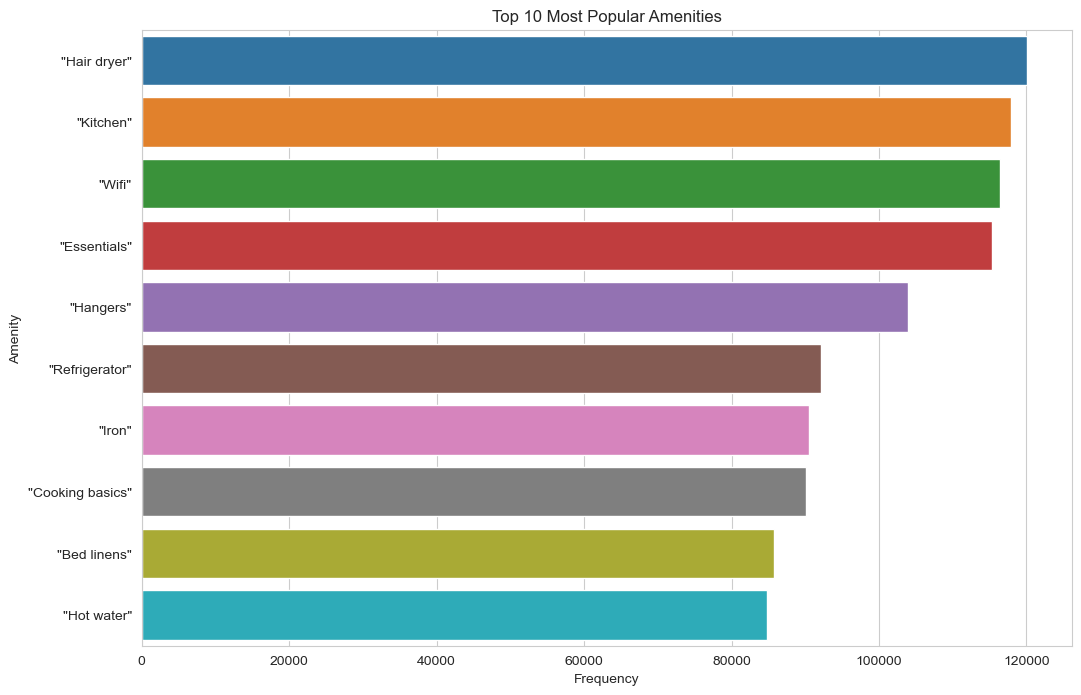

In [54]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the 'listings' dataframe
df = combined_dataframes.get('listings_2.csv')

if df is not None:
    # Display the first few rows of the dataframe to understand its structure
    print(df.head())

# Check if the 'amenities' column exists
if 'amenities' in df.columns:
    # Split the amenities into a list of lists
    all_amenities = df['amenities'].str.strip('{}').str.split(',').tolist()
    
    # Flatten the list of lists into a single list
    flattened_amenities = [amenity.strip() for sublist in all_amenities for amenity in sublist]
    
    # Count the frequency of each amenity
    amenities_counter = Counter(flattened_amenities)
    
    # Convert the Counter to a DataFrame for easier manipulation
    amenities_df = pd.DataFrame(amenities_counter.items(), columns=['amenity', 'count'])
    
    # Sort the DataFrame by count in descending order
    amenities_df = amenities_df.sort_values(by='count', ascending=False)
    
    # Display the most popular amenities
    print(amenities_df.head(10))
    
    # Visualize the results
    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y='amenity', data=amenities_df.head(10))
    plt.title('Top 10 Most Popular Amenities')
    plt.xlabel('Frequency')
    plt.ylabel('Amenity')
    plt.show()
else:
    print("The 'amenities' column is not present in the dataset.")


                   id                                      listing_url  \
0            53527563            https://www.airbnb.com/rooms/53527563   
1  583843076540750428  https://www.airbnb.com/rooms/583843076540750428   
2  902842874652788522  https://www.airbnb.com/rooms/902842874652788522   
3            53570244            https://www.airbnb.com/rooms/53570244   
4  922282138679070466  https://www.airbnb.com/rooms/922282138679070466   

        scrape_id last_scraped       source  \
0  20231229163156   2023-12-29  city scrape   
1  20231229163156   2023-12-29  city scrape   
2  20231229163156   2023-12-29  city scrape   
3  20231229163156   2023-12-30  city scrape   
4  20231229163156   2023-12-30  city scrape   

                                                name  \
0  Rental unit in Dossena · ★4.43 · 1 bedroom · 2...   
1  Rental unit in Plassi · ★4.85 · 1 bedroom · 2 ...   
2  Rental unit in Ranzanico · ★4.83 · 1 bedroom ·...   
3  Vacation home in Bergamo · ★4.93 · 2 bedrooms

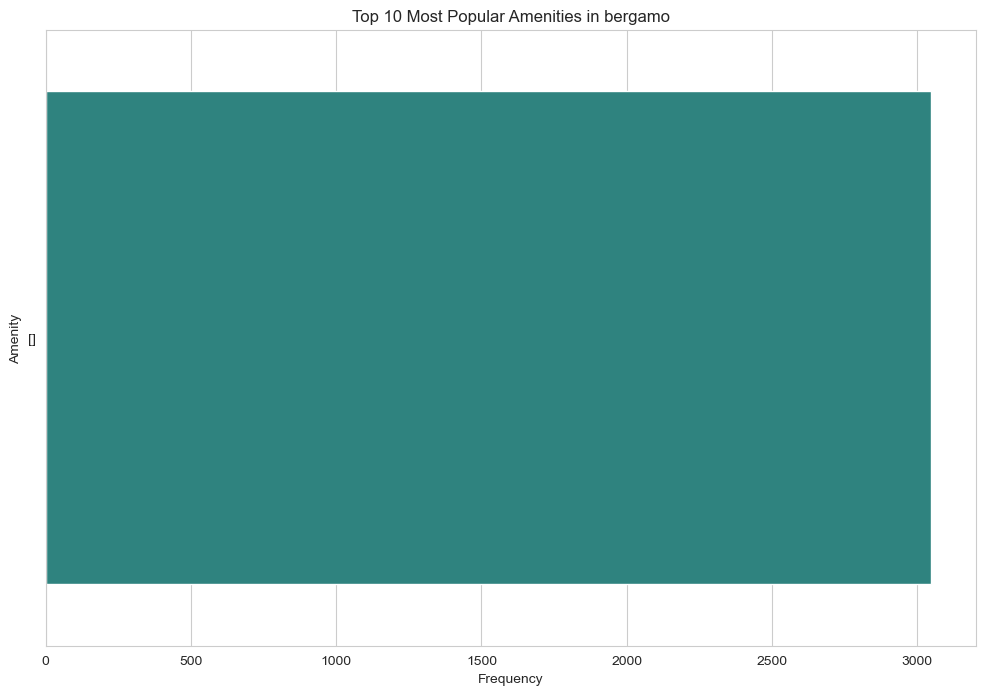

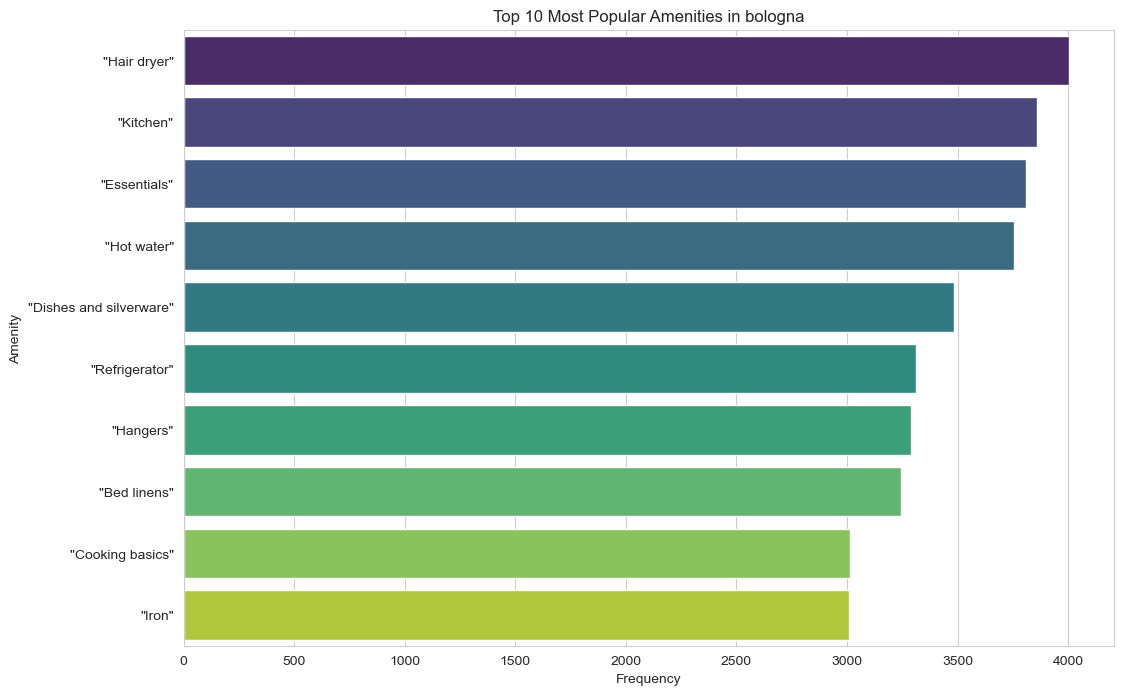

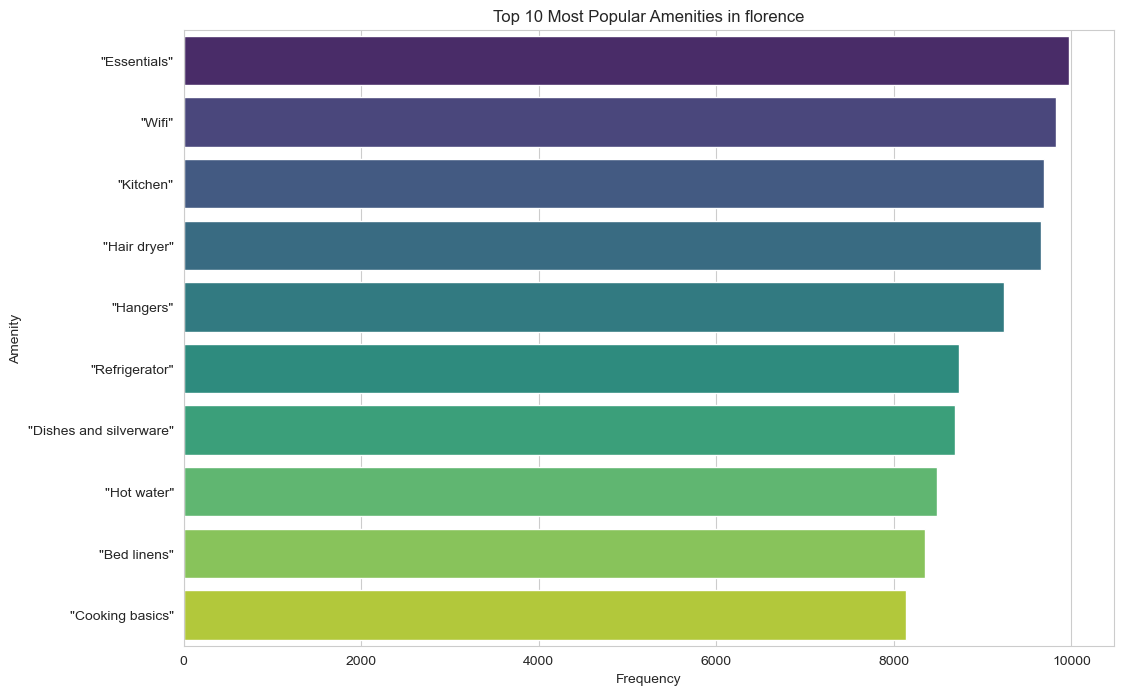

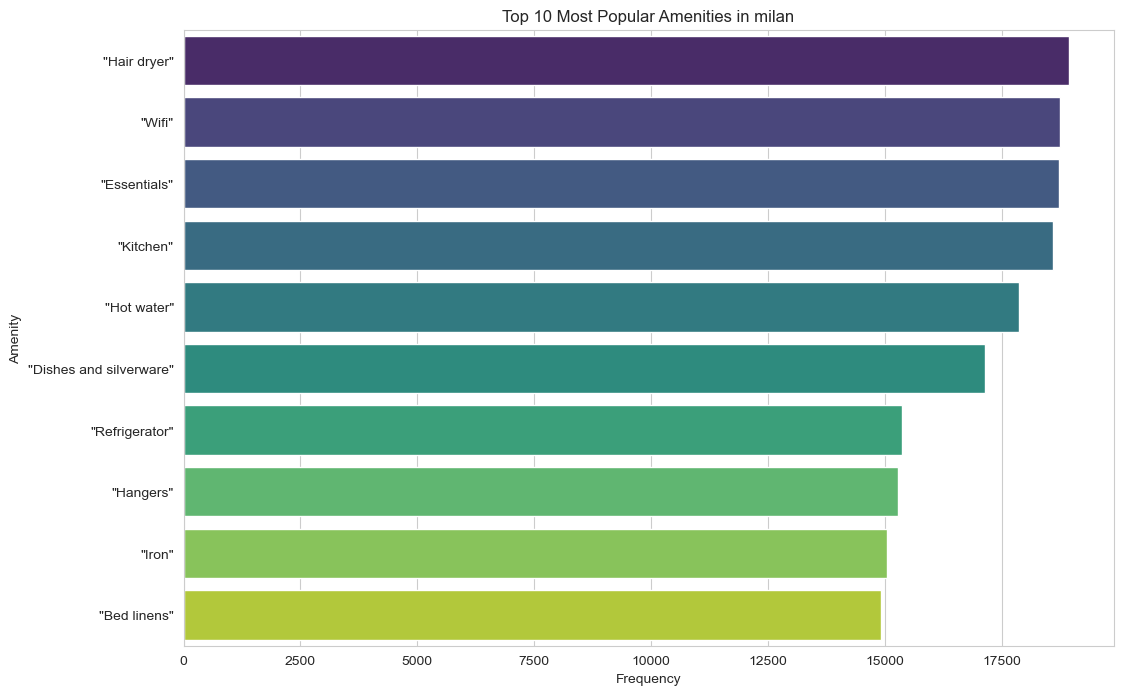

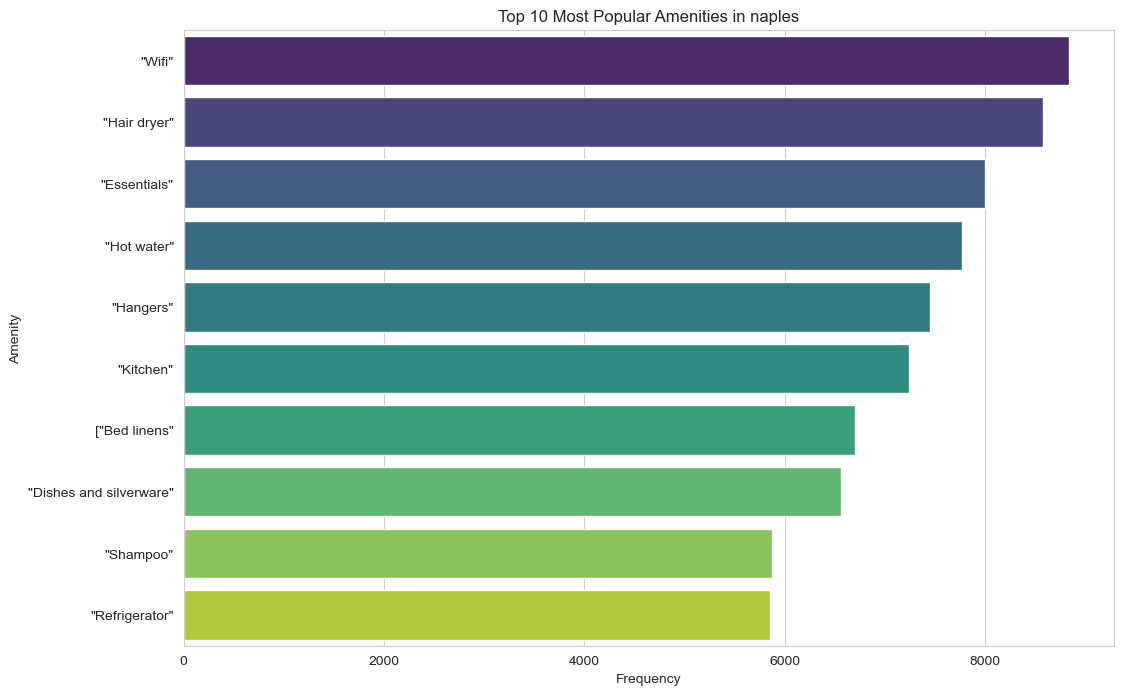

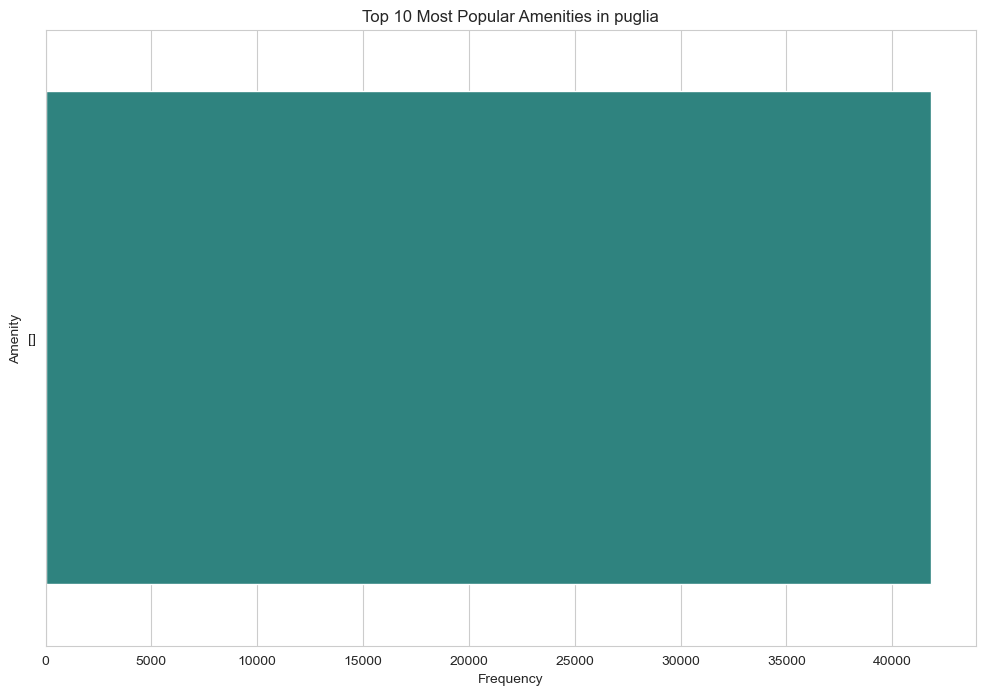

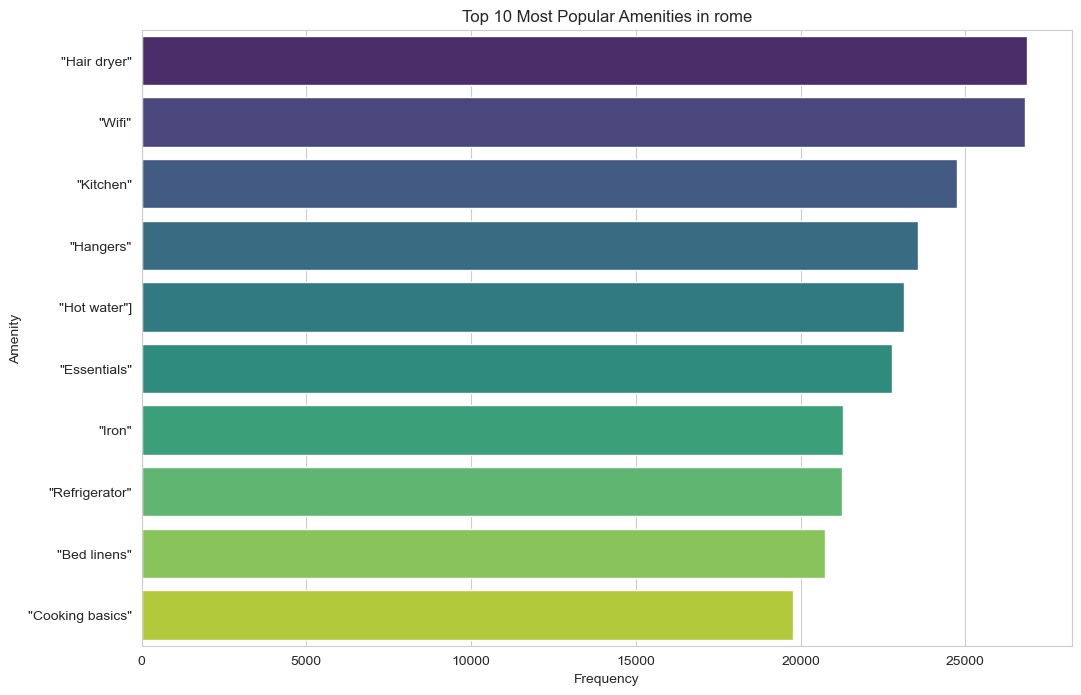

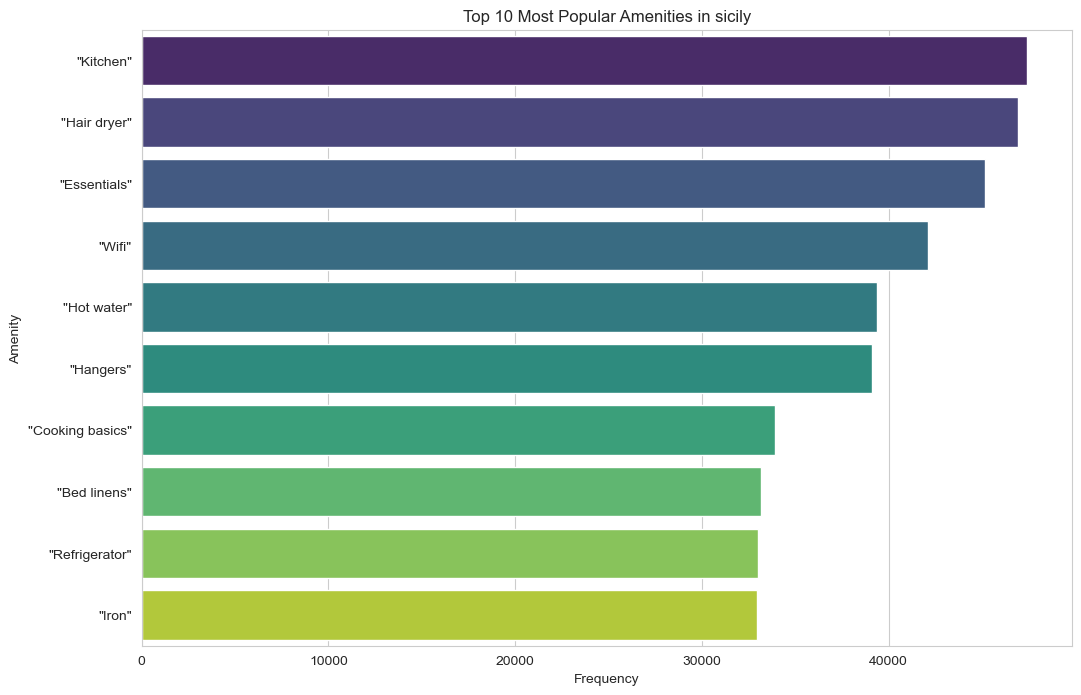

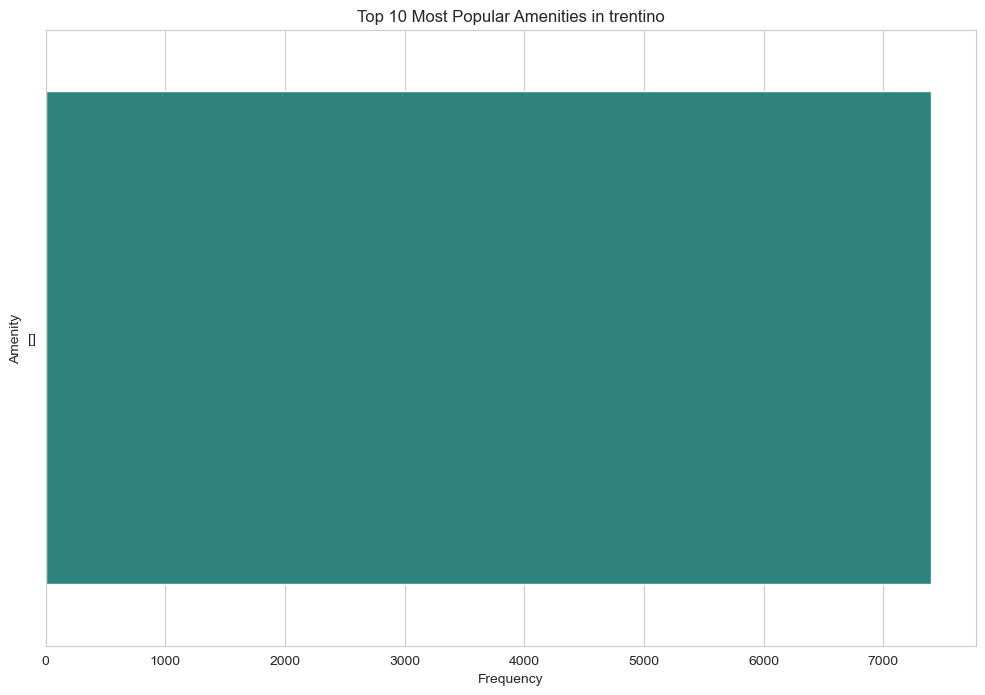

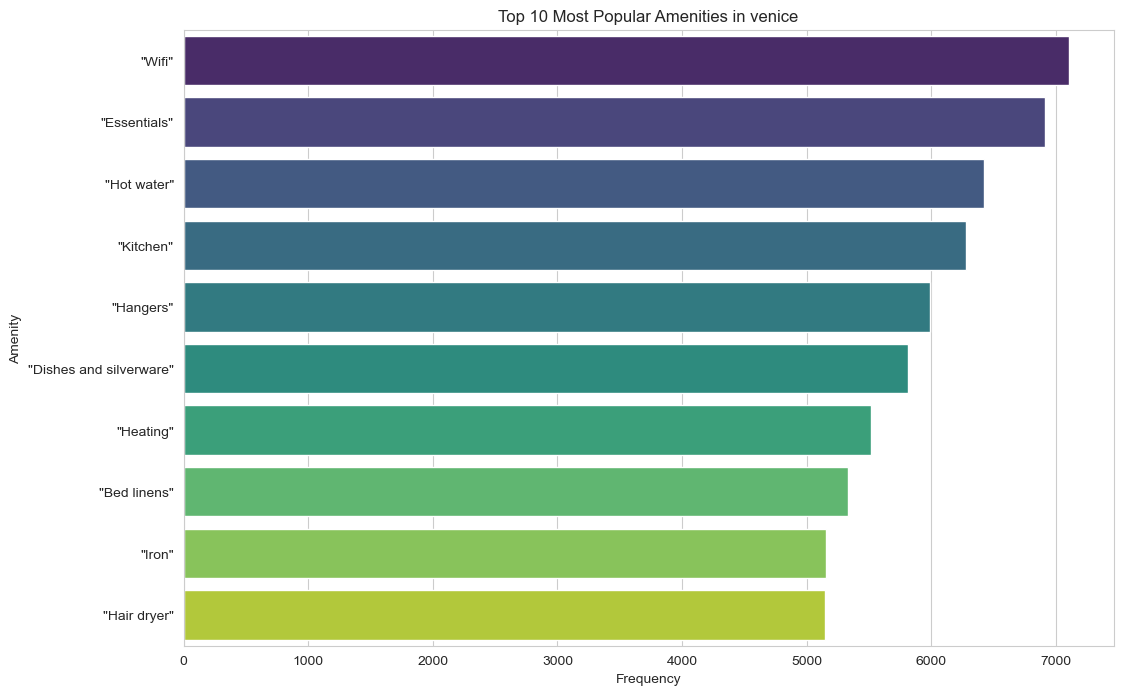

In [59]:
# Extract the 'listings_2' dataframe
df = combined_dataframes.get('listings_2.csv')

if df is not None:
    # Display the first few rows of the dataframe to understand its structure
    print(df.head())

    # Check if the 'amenities' and 'City' columns exist
    if 'amenities' in df.columns and 'City' in df.columns:
        # Initialize a dictionary to store amenities count per city
        city_amenities_counter = {}

        # Iterate over each city
        for city in df['City'].unique():
            # Filter the dataframe for the current city
            city_df = df[df['City'] == city]

            # Split the amenities into a list of lists for the current city
            all_amenities = city_df['amenities'].str.strip('{}').str.split(',').tolist()

            # Flatten the list of lists into a single list
            flattened_amenities = [amenity.strip() for sublist in all_amenities for amenity in sublist]

            # Count the frequency of each amenity
            amenities_counter = Counter(flattened_amenities)

            # Store the counter in the dictionary with the city as the key
            city_amenities_counter[city] = amenities_counter

        # Convert the dictionary to a DataFrame for easier manipulation
        amenities_list = []
        for city, counter in city_amenities_counter.items():
            for amenity, count in counter.items():
                amenities_list.append({'City': city, 'amenity': amenity, 'count': count})
        
        amenities_df = pd.DataFrame(amenities_list)

        # Sort the DataFrame by city and count in descending order
        amenities_df = amenities_df.sort_values(by=['City', 'count'], ascending=[True, False])

        # Display the top amenities per city
        top_amenities_per_city = amenities_df.groupby('City').head(10)
        print(top_amenities_per_city)

        # Visualize the results
        cities = top_amenities_per_city['City'].unique()
        for city in cities:
            city_data = top_amenities_per_city[top_amenities_per_city['City'] == city]
            plt.figure(figsize=(12, 8))
            sns.barplot(data=city_data, x='count', y='amenity', palette='viridis')
            plt.title(f'Top 10 Most Popular Amenities in {city}')
            plt.xlabel('Frequency')
            plt.ylabel('Amenity')
            plt.show()
    else:
        print("The 'amenities' or 'City' column is not present in the dataset.")
else:
    print("The 'listings_2.csv' dataframe is not present in the combined dataframes.")

#### Creating the Data Base

In [ ]:
# Installing the necessary libraries
!pip install sqlalchemy psycopg2-binary pandas

In [5]:
import sqlite3
import psycopg2
from sqlalchemy import create_engine

In [ ]:
# Database name
database_name = 'Airbnd_Italia.db'

# Mapping of pandas data types to SQLite data types
type_mapping = {
    'int64': 'INTEGER',
    'float64': 'REAL',
    'object': 'TEXT',
    'bool': 'INTEGER',
    'datetime64[ns]': 'TEXT',
    'timedelta[ns]': 'TEXT'
}

# Function to create a table automatically from a DataFrame
def create_table_from_dataframe(df, table_name, conn):
    cursor = conn.cursor()
    columns = []
    for col, dtype in zip(df.columns, df.dtypes):
        sql_type = type_mapping.get(str(dtype), 'TEXT')
        columns.append(f"{col} {sql_type}")
    columns_sql = ", ".join(columns)
    # Drop the table if it already exists to recreate it
    cursor.execute(f"DROP TABLE IF EXISTS {table_name}")
    create_table_query = f"CREATE TABLE {table_name} ({columns_sql})"
    cursor.execute(create_table_query)

# Function to insert data from a DataFrame into the corresponding table
def insert_data_from_dataframe(df, table_name, conn, chunk_size=1000):
    cursor = conn.cursor()
    columns = ", ".join(df.columns)
    placeholders = ", ".join(["?" for _ in df.columns])
    insert_query = f"INSERT INTO {table_name} ({columns}) VALUES ({placeholders})"
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]
        data_tuples = [tuple(x) for x in chunk.to_numpy()]
        cursor.executemany(insert_query, data_tuples)
    conn.commit()

# Connect to the database
conn = sqlite3.connect(database_name)

# Create tables and insert data for all DataFrames
for filename, df in combined_dataframes.items():
    table_name = filename.replace('.csv', '')
    create_table_from_dataframe(df, table_name, conn)
    insert_data_from_dataframe(df, table_name, conn)

# Close the connection
conn.close()